# Wavelength Analysis with Four Filters (2021-08)

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from astropy.io import fits
import numpy as np
from importlib import reload
from astropy.stats import sigma_clipped_stats

from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from imaka.analysis import fourfilt
from imaka.analysis import moffat

In [4]:
# Dates:
from imaka.reduce.nights import reduce_2021_08_27 as redu_27
from imaka.reduce.nights import reduce_2021_08_28 as redu_28
from imaka.reduce.nights import reduce_2021_08_29 as redu_29
from imaka.reduce.nights import reduce_2021_08_30 as redu_30

redu_objs = [redu_27, redu_28, redu_29, redu_30]

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [5]:
filters = ["B", "V", "R", "I"]

# **Plot set one:** 
## FA vs. wav vs. min. FWHM

Here we want to look at the best way to look at these three variables

## Plot 1: summary by Field Orientation

In [15]:
### Generate file list
# just adding open and closed

stats_o = []
stats_c = []

for redu in redu_objs:
    stats_o.append([redu.stats_dir + f'stats__o_{f}.fits' for f in filters])
    stats_c.append([redu.stats_dir + f'stats_LS_c_{f}.fits' for f in filters])

In [34]:
# combine to a large table?
stat_tables_c = []

for date in stats_c:
    table_tmp = [Table.read(f) for f in date]
    stat_tables_c.append(vstack(table_tmp))
    
# combine to a large table?
stat_tables_o = []

for date in stats_o:
    table_tmp = [Table.read(f) for f in date]
    stat_tables_o.append(vstack(table_tmp))

In [43]:
print(stat_tables_o[0].colnames)

['Image', 'FILTER', 'BINFAC', 'DATE_UTC', 'TIME_UTC', 'DATE_HST', 'TIME_HST', 'FWHM', 'FWHM_std', 'EE25', 'EE50', 'EE80', 'NEA', 'NEA2', 'xFWHM', 'yFWHM', 'theta', 'emp_fwhm', 'emp_fwhm_std', 'quadrant', 'Index', 'N Stars', 'N Sky', 'N Sky std', 'Amplitude', 'Amplitude std', 'Phi', 'Phi std', 'Beta', 'Beta std', 'Minor Alpha', 'Minor Alpha std', 'Major Alpha', 'Major Alpha std', 'F_ORD', 'wavelength', 'quad']


In [ ]:
stat_tables_o[0].colnames

/g/lu/data/imaka/onaga/20210827/sta/reduce/stats/stats_LS_c_B.fits
N 0.5216149785485726
/g/lu/data/imaka/onaga/20210827/sta/reduce/stats/stats_LS_c_V.fits
S 0.4596526894087234
/g/lu/data/imaka/onaga/20210827/sta/reduce/stats/stats_LS_c_R.fits
N 0.37057472631695576
/g/lu/data/imaka/onaga/20210827/sta/reduce/stats/stats_LS_c_I.fits
S 0.3523900802433287
/g/lu/data/imaka/onaga/20210828/sta/reduce/stats/stats_LS_c_B.fits
S 0.530741676313819
/g/lu/data/imaka/onaga/20210828/sta/reduce/stats/stats_LS_c_V.fits
N 0.5355763380489876
/g/lu/data/imaka/onaga/20210828/sta/reduce/stats/stats_LS_c_R.fits
S 0.37498575742006923
/g/lu/data/imaka/onaga/20210828/sta/reduce/stats/stats_LS_c_I.fits
N 0.3463157141501948
/g/lu/data/imaka/onaga/20210829/sta/reduce/stats/stats_LS_c_B.fits
N 0.6045304971869915
/g/lu/data/imaka/onaga/20210829/sta/reduce/stats/stats_LS_c_V.fits
N 0.5786629892813999
/g/lu/data/imaka/onaga/20210829/sta/reduce/stats/stats_LS_c_R.fits
S 0.49493053586208613
/g/lu/data/imaka/onaga/2021082

[]

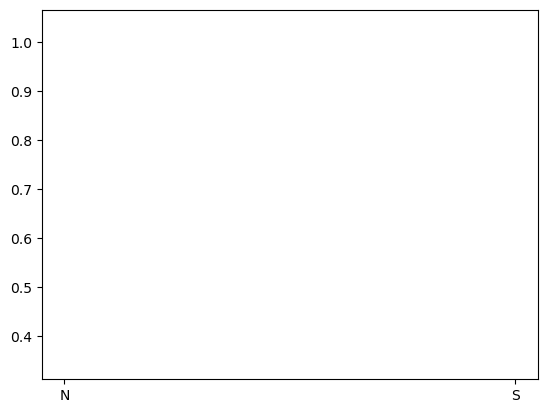

In [65]:
## FWHM vs. wavelength, cb = FA

for date_list in stats_c:
    for stat_f in date_list:
        print(stat_f)
        stats = Table.read(stat_f)
        f = stats['FILTER'][0]
        FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stat_f, filt=False, plate_scale=stats.meta['SCALE'])
        
        print(stats['quadrant'][0][0], np.median(FWHM_min))
        plt.errorbar(stats['quadrant'][0][0], np.median(FWHM_min), label=f, ecolor='lightgray', alpha = 0.8)
        
plt.plot()
        

In [ ]:
# iterate through filters
for fil_band in filters:
    f_closed = f'{root_dir}reduce/stats/stats_{c_key}_{fil_band}_mdp.fits'
    f_open = f'{root_dir}reduce/stats/stats__o_{fil_band}_mdp.fits'
    ##f_tt = f'{root_dir}reduce/stats/stats_tt_c_{fil_band}_mdp.fits'
    
    files = [f_closed, f_open]

    # TODO: outlier rejection
    #pt2
    
    for e, stat_f in enumerate(files):
        stats = Table.read(stat_f)
        FWHM_min, sig_FWHM_min, FWHM_maj, sig_FWHM_maj = moffat.calc_mof_fwhm(stat_f, filt=False, plate_scale=stats.meta['SCALE'])
        ax[0].errorbar(np.median(FWHM_min), np.median(stats['Beta']), xerr=np.median(sig_FWHM_min), yerr=np.median(stats['Beta std']), fmt=dict_filt[fil_band]+f_fmt[e], label=f"{fil_band} {f_key[e]}", ecolor='lightgray', alpha = 0.8)
        ax[1].errorbar(np.median(FWHM_maj), np.median(stats['Beta']), xerr=np.median(sig_FWHM_maj), yerr=np.median(stats['Beta std']), fmt=dict_filt[fil_band]+f_fmt[e], label=f"{fil_band} {f_key[e]}", ecolor='lightgray', alpha = 0.8)
    
    
ax[0].set_xlabel(r'FWHM Moffat MIN (as)')
ax[1].set_xlabel(r'FWHM Moffat MAJ (as)')
ax[0].set_ylabel(r'$\beta$')

ax[1].set_ylim(1, 7)    
ax[0].set_ylim(1, 7)

ax[1].set_xlim(0, 1.5)    
ax[0].set_xlim(0, 1.5)

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

plt.suptitle(f"Moffat Fit {c_key} Min and Maj Moffat FWHM, \n summary for {night}, IVBR and VBRI")
plt.plot()

# **Plot set two:** 
## Moff FWHM vs. MASS DIMM

Looking at the relationship between seeing and returned values across all nights in the run. 

"The data in the plot below shows empirical FWHM as a function of seeing, each data point representing one frame. Ideally, the FWHM in open loop should match the DIMM seeing, while the closed loop should match MASS seeing, having data points fall along the diagonal black line. Though open loop data at high seeing seems to be better than ideal, our closed loop data is generally above the black line, that is, not reaching the PSF we expect from the seeing measurments."

In [ ]:
plot_stats.plot_week_fwhm(labels, data_dir_root, stats_dir_end, "FWHM vs Seeing for February 2017 Run")

Text(0.5, 0.98, 'MASS/DIMM scaling for Four Filter run')

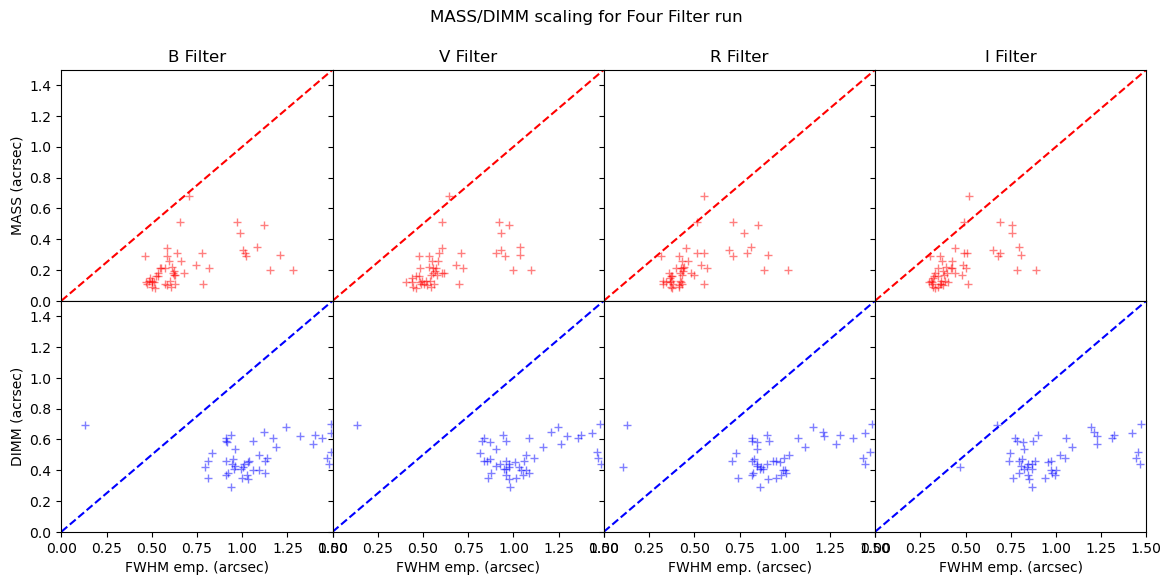

In [68]:
# per night: redu_objs
# per filter: filters
# sperate by open and closed

plt.figure(1, figsize=(14, 6))
ax = [plt.subplot(2,4,i+1) for i in range(8)]

for i, a in enumerate(ax):
    if i%4 != 0 :
        a.set_yticklabels([])
    if i <4:
        a.set_xticklabels([])
    
plt.subplots_adjust(wspace=0, hspace=0)

for i, filt in enumerate(filters):
    for redu in redu_objs:
        #### OPEN ####
        o_file = f"{redu.stats_dir}stats__o_{filt}_mdp.fits"
        open_data = Table.read(o_file)
        
        scale = open_data.meta['SCALE']
        o_data = np.array(open_data['emp_fwhm'])
        o_binfac = np.array(open_data['BINFAC'])
        o_filt =  plot_stats.filter2wv(np.array(open_data['FILTER']).astype('U13'))
        open_fin = o_data * scale* o_binfac #* (500/o_filt)**(1/5)
        DIMM = np.array(open_data['DIMM'])
        
        #### CLOSED ####
        closed_file =  f"{redu.stats_dir}stats_LS_c_{filt}_mdp.fits"
        closed_data = Table.read(closed_file)
        c_data = np.array(closed_data['emp_fwhm'])
        c_binfac = np.array(closed_data['BINFAC'])
        c_filt =  plot_stats.filter2wv(np.array(closed_data['FILTER']).astype('U13'))
        closed_fin = c_data * scale * c_binfac #* (500/c_filt)**(1/5)
        MASS = np.array(closed_data['MASS'])

        ax[i].plot(closed_fin, MASS, 'r+', label='Closed vs MASS', alpha = 0.5)
        ax[i].set_xlim(0,1.5)
        ax[i].set_ylim(0,1.5)
        ax[i+4].plot(open_fin, DIMM, 'b+', label='Open vs DIMM', alpha = 0.5)
        ax[i+4].set_xlim(0,1.5)
        ax[i+4].set_ylim(0,1.5)
        
    ax[i].set_title(f"{filt} Filter")
    ax[i].plot(np.arange(0, 2, 0.1), np.arange(0, 2, 0.1), 'r--')
    ax[i+4].plot(np.arange(0, 2, 0.1), np.arange(0, 2, 0.1), 'b--')
    ax[i+4].set_xlabel("FWHM emp. (arcsec)")
    
ax[0].set_ylabel("MASS (acrsec)")
ax[4].set_ylabel("DIMM (acrsec)")

plt.suptitle("MASS/DIMM scaling for Four Filter run")

I
R
V
B


Text(0.5, 0.98, 'MASS/DIMM for Four Filter run (scaled to filter)')

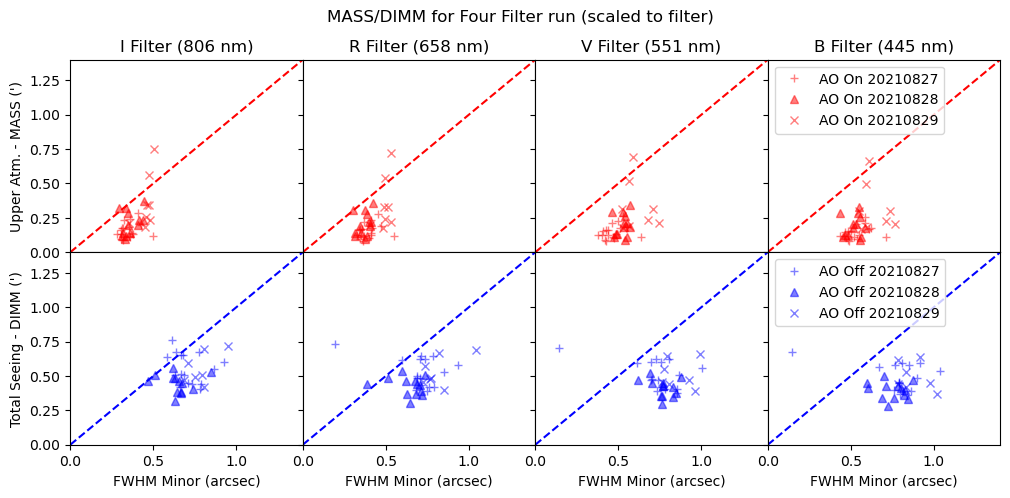

In [95]:
# per night: redu_objs
# per filter: filters
# sperate by open and closed

filters = ["I", "R", "V", "B"]

plt.figure(1, figsize=(12, 5))
ax = [plt.subplot(2,4,i+1) for i in range(8)]

for i, a in enumerate(ax):
    if i%4 != 0 :
        a.set_yticklabels([])
    if i <4:
        a.set_xticklabels([])
    
plt.subplots_adjust(wspace=0, hspace=0)

for i, filt in enumerate(filters):
    fmt_iter = iter(["+", "^", "x", "o"])
    for redu in redu_objs[:-1]:
        #### OPEN ####
        o_file = f"{redu.stats_dir}stats__o_{filt}_mdp.fits"
        open_data = Table.read(o_file)
        
        scale = open_data.meta['SCALE']
        o_FWHM_min, o_sig_FWHM_min, o_FWHM_maj, o_sig_FWHM_maj = moffat.calc_mof_fwhm_data(open_data, plate_scale=scale)

        o_data = np.array(open_data['emp_fwhm'])
        o_binfac = np.array(open_data['BINFAC'])
        o_filt =  plot_stats.filter2wv(np.array(open_data['FILTER']).astype('U13'))
        open_fin = o_data * scale* o_binfac #* (500/o_filt)**(1/5)
        DIMM = np.array(open_data['DIMM'])*(o_filt/500)**(1/5)
        
        #### CLOSED ####
        closed_file =  f"{redu.stats_dir}stats_LS_c_{filt}_mdp.fits"
        closed_data = Table.read(closed_file)
        c_FWHM_min, c_sig_FWHM_min, c_FWHM_maj, c_sig_FWHM_maj = moffat.calc_mof_fwhm_data(closed_data, plate_scale=scale)
        
        c_data = np.array(closed_data['emp_fwhm'])
        c_binfac = np.array(closed_data['BINFAC'])
        c_filt =  plot_stats.filter2wv(np.array(closed_data['FILTER']).astype('U13'))
        closed_fin = c_data * scale * c_binfac #* (500/c_filt)**(1/5)
        MASS = np.array(closed_data['MASS']) *(c_filt/500)**(1/5)
        
        fmt_filt = next(fmt_iter)
        ax[i].plot(c_FWHM_min, MASS, 'r'+fmt_filt, label=f'AO On {redu.night[-8:]}', alpha = 0.5)
        ax[i].set_xlim(0,1.4)
        ax[i].set_ylim(0,1.4)
        ax[i+4].plot(o_FWHM_min, DIMM, 'b'+fmt_filt, label=f'AO Off {redu.night[-8:]}', alpha = 0.5)
        ax[i+4].set_xlim(0,1.4)
        ax[i+4].set_ylim(0,1.4)
        
    ax[i].set_title(f"{filt} Filter ({plot_stats.filter2wv(filt)} nm)")
    ax[i].plot(np.arange(0, 2, 0.1), np.arange(0, 2, 0.1), 'r--')
    ax[i+4].plot(np.arange(0, 2, 0.1), np.arange(0, 2, 0.1), 'b--')
    ax[i+4].set_xlabel("FWHM Minor (arcsec)")
    
ax[3].legend()
ax[7].legend()
    
ax[0].set_ylabel("Upper Atm. - MASS (')")
ax[4].set_ylabel("Total Seeing - DIMM (')")

plt.suptitle("MASS/DIMM for Four Filter run (scaled to filter)")

I
R
V
B


Text(0.5, 0.98, 'MASS/DIMM for Four Filter run (scaled to filter)')

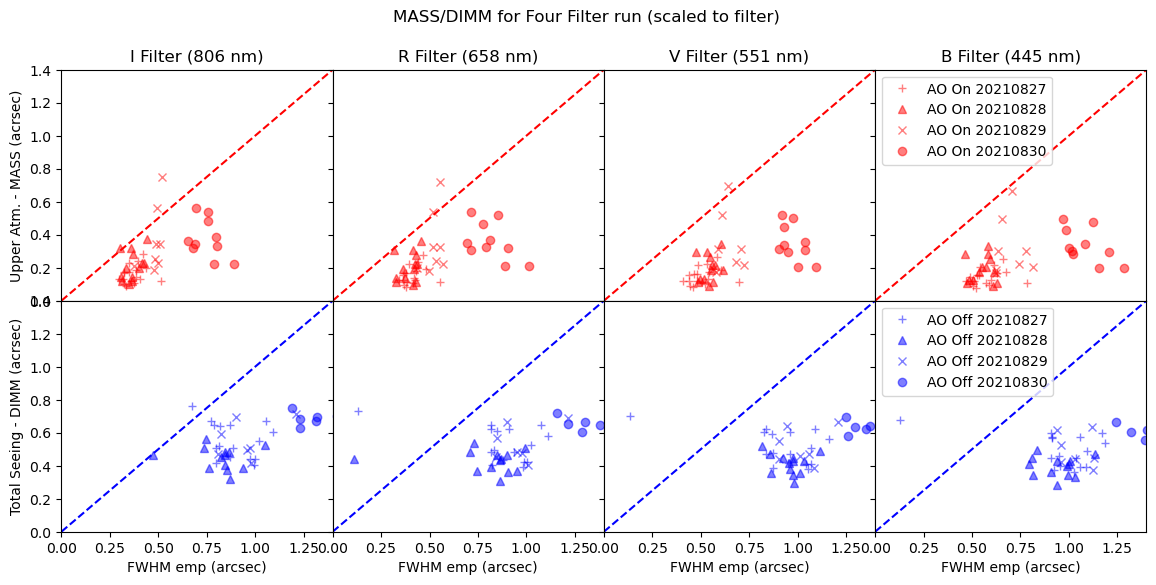

In [92]:
# per night: redu_objs
# per filter: filters
# sperate by open and closed

filters = ["I", "R", "V", "B"]

plt.figure(1, figsize=(14, 6))
ax = [plt.subplot(2,4,i+1) for i in range(8)]

for i, a in enumerate(ax):
    if i%4 != 0 :
        a.set_yticklabels([])
    if i <4:
        a.set_xticklabels([])
    
plt.subplots_adjust(wspace=0, hspace=0)

for i, filt in enumerate(filters):
    fmt_iter = iter(["+", "^", "x", "o"])
    for redu in redu_objs:
        #### OPEN ####
        o_file = f"{redu.stats_dir}stats__o_{filt}_mdp.fits"
        open_data = Table.read(o_file)
        
        scale = open_data.meta['SCALE']
        o_FWHM_min, o_sig_FWHM_min, o_FWHM_maj, o_sig_FWHM_maj = moffat.calc_mof_fwhm_data(open_data, plate_scale=scale)

        o_data = np.array(open_data['emp_fwhm'])
        o_binfac = np.array(open_data['BINFAC'])
        o_filt =  plot_stats.filter2wv(np.array(open_data['FILTER']).astype('U13'))
        open_fin = o_data * scale* o_binfac #* (500/o_filt)**(1/5)
        DIMM = np.array(open_data['DIMM'])*(o_filt/500)**(1/5)
        
        #### CLOSED ####
        closed_file =  f"{redu.stats_dir}stats_LS_c_{filt}_mdp.fits"
        closed_data = Table.read(closed_file)
        c_FWHM_min, c_sig_FWHM_min, c_FWHM_maj, c_sig_FWHM_maj = moffat.calc_mof_fwhm_data(closed_data, plate_scale=scale)
        
        c_data = np.array(closed_data['emp_fwhm'])
        c_binfac = np.array(closed_data['BINFAC'])
        c_filt =  plot_stats.filter2wv(np.array(closed_data['FILTER']).astype('U13'))
        closed_fin = c_data * scale * c_binfac #* (500/c_filt)**(1/5)
        MASS = np.array(closed_data['MASS']) *(c_filt/500)**(1/5)
        
        fmt_filt = next(fmt_iter)
        ax[i].plot(closed_fin, MASS, 'r'+fmt_filt, label=f'AO On {redu.night[-8:]}', alpha = 0.5)
        ax[i].set_xlim(0,1.4)
        ax[i].set_ylim(0,1.4)
        ax[i+4].plot(open_fin, DIMM, 'b'+fmt_filt, label=f'AO Off {redu.night[-8:]}', alpha = 0.5)
        ax[i+4].set_xlim(0,1.4)
        ax[i+4].set_ylim(0,1.4)
        
    ax[i].set_title(f"{filt} Filter ({plot_stats.filter2wv(filt)} nm)")
    ax[i].plot(np.arange(0, 2, 0.1), np.arange(0, 2, 0.1), 'r--')
    ax[i+4].plot(np.arange(0, 2, 0.1), np.arange(0, 2, 0.1), 'b--')
    ax[i+4].set_xlabel("FWHM emp (arcsec)")
    
ax[3].legend()
ax[7].legend()
    
ax[0].set_ylabel("Upper Atm. - MASS (acrsec)")
ax[4].set_ylabel("Total Seeing - DIMM (acrsec)")

plt.suptitle("MASS/DIMM for Four Filter run (scaled to filter)")

### FA vs. FWHM
Here we want to know how the seperation from center affects FWHM from the stacked image starlists. 